In [1]:
import json
import xmltodict
import pandas as pd
import numpy as np
from datetime import date
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

# Autores

Fonte
 https://www.al.sp.gov.br/dados-abertos/recurso/81

In [2]:
with open("dados/processo_legislativo/documento_autor_julho_2018.xml", 'r') as f:
    xmlString = f.read()

In [3]:
jsonString = json.dumps(xmltodict.parse(xmlString), indent=4)

In [4]:
with open("output.json", 'w') as f:
    f.write(jsonString)

In [5]:
arquivo_json = open('output.json', 'r')
dados_json = json.load(arquivo_json)

In [6]:
#dados_json['documentos_autores']['DocumentoAutor']

In [6]:
lista = dados_json['documentos_autores']['DocumentoAutor']

In [7]:
df_autores = pd.DataFrame(lista, columns = ['IdAutor', 'IdDocumento', 'NomeAutor'])

In [8]:
df_autores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700123 entries, 0 to 700122
Data columns (total 3 columns):
IdAutor        700123 non-null object
IdDocumento    700123 non-null object
NomeAutor      700123 non-null object
dtypes: object(3)
memory usage: 16.0+ MB


In [13]:
df_autores.to_csv('resultados/todos_autores_projetos.csv', index=False) 

Exemplo de busca de um autor

In [9]:
nome = df_autores [(df_autores ['IdAutor'] == '1000000242')]
nome

,IdAutor,IdDocumento,NomeAutor
573492,1000000242,1000214709,Gustavo Petta
674618,1000000242,1000214907,Gustavo Petta
676386,1000000242,1000221120,Gustavo Petta
680887,1000000242,1000215996,Gustavo Petta
682382,1000000242,1000215523,Gustavo Petta
683812,1000000242,1000213599,Gustavo Petta
683927,1000000242,1000221675,Gustavo Petta
699848,1000000242,1000217233,Gustavo Petta
699849,1000000242,1000217234,Gustavo Petta
700073,1000000242,1000218265,Gustavo Petta


In [10]:
#df_autores.reset_index()

Carrega nomes de deputados da atual legislatura

In [10]:
nomes_deputados_atual_legislatura = pd.read_csv('resultados/deputados_selecionados_final.csv', converters={'sequencial': lambda x: str(x), 'cpf': lambda x: str(x), 'codigo_unico': lambda x: str(x) })
nomes_deputados_atual_legislatura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 9 columns):
codigo_unico       120 non-null object
nome_deputado      120 non-null object
uf                 120 non-null object
nome_completo      120 non-null object
sequencial         120 non-null object
cpf                120 non-null object
nome_urna          120 non-null object
partido_eleicao    120 non-null object
situacao           120 non-null object
dtypes: object(9)
memory usage: 8.5+ KB


Filtra por esses nomes, com o código

In [11]:
df_autores_atuais = pd.merge(df_autores, nomes_deputados_atual_legislatura, left_on='IdAutor', right_on='codigo_unico')

In [12]:
df_autores_atuais.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347649 entries, 0 to 347648
Data columns (total 12 columns):
IdAutor            347649 non-null object
IdDocumento        347649 non-null object
NomeAutor          347649 non-null object
codigo_unico       347649 non-null object
nome_deputado      347649 non-null object
uf                 347649 non-null object
nome_completo      347649 non-null object
sequencial         347649 non-null object
cpf                347649 non-null object
nome_urna          347649 non-null object
partido_eleicao    347649 non-null object
situacao           347649 non-null object
dtypes: object(12)
memory usage: 34.5+ MB


Todos os 120 deputados têm pelo menos um projeto na história

In [14]:
conta = len(df_autores_atuais['IdAutor'].value_counts())
conta

120

# Proposituras

https://www.al.sp.gov.br/dados-abertos/recurso/56

In [15]:
with open("dados/processo_legislativo/proposituras_julho_2018.xml", 'r') as f:
    xmlString = f.read()

In [16]:
jsonString = json.dumps(xmltodict.parse(xmlString), indent=4)

In [17]:
with open("output.json", 'w') as f:
    f.write(jsonString)

In [18]:
arquivo_json = open('output.json', 'r')
dados_json = json.load(arquivo_json)

In [19]:
#dados_json['proposituras']['propositura']

In [20]:
lista = dados_json['proposituras']['propositura']

In [21]:
df_proposituras = pd.DataFrame(lista, columns = ['AnoLegislativo', 'CodOriginalidade', 'DtEntradaSistema', 'DtPublicacao', 'Ementa', 'IdDocumento', 'IdNatureza', 'NroLegislativo'])

In [22]:
df_proposituras['DtEntradaSistema'] = pd.to_datetime(df_proposituras['DtEntradaSistema'])
df_proposituras['DtPublicacao'] = pd.to_datetime(df_proposituras['DtPublicacao'])

In [23]:
df_proposituras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191101 entries, 0 to 191100
Data columns (total 8 columns):
AnoLegislativo      191101 non-null object
CodOriginalidade    138917 non-null object
DtEntradaSistema    191073 non-null datetime64[ns]
DtPublicacao        191101 non-null datetime64[ns]
Ementa              191101 non-null object
IdDocumento         191101 non-null object
IdNatureza          191101 non-null object
NroLegislativo      191101 non-null object
dtypes: datetime64[ns](2), object(6)
memory usage: 11.7+ MB


# Natureza

https://www.al.sp.gov.br/dados-abertos/recurso/44

In [24]:
with open("dados/processo_legislativo/naturezasSpl.xml", 'r') as f:
    xmlString = f.read()
jsonString = json.dumps(xmltodict.parse(xmlString), indent=4)
with open("output.json", 'w') as f:
    f.write(jsonString)

In [25]:
arquivo_json = open('output.json', 'r')
dados_json = json.load(arquivo_json)

In [26]:
#dados_json

In [27]:
lista = dados_json['natureza']['natureza']
df_natureza = pd.DataFrame(lista, columns = ['idNatureza', 'nmNatureza', 'sgNatureza', 'tpNatureza'])

In [28]:
df_natureza.to_csv('resultados/natureza_projetos_alesp.csv', index=False)

Temas escolhidos

141	Projeto de lei de PPA <br>
142	Projeto de lei do Orçamento <br>
147	Req. de Comissão Parlamentar Especial <br>
1	Projeto de lei <br>
2	Projeto de lei Complementar <br>
3	Projeto de resolução <br>
4	Projeto de decreto legislativo <br>
5	Proposta de emenda à Constituição <br>
10	Projeto de Constituição <br>
24	Lei <br>
33	Lei Complementar <br>
35	Lei (§ 7ª - artigo 28) <br>
40	Decreto Legislativo'''

In [29]:
projetos_acao_parlamentar = df_proposituras[(df_proposituras['IdNatureza'] == '141') | 
                                            (df_proposituras['IdNatureza'] == '142') | 
                                            (df_proposituras['IdNatureza'] == '147') | 
                                            (df_proposituras['IdNatureza'] == '1') | 
                                            (df_proposituras['IdNatureza'] == '2') | 
                                            (df_proposituras['IdNatureza'] == '3') | 
                                            (df_proposituras['IdNatureza'] == '4') | 
                                            (df_proposituras['IdNatureza'] == '5') | 
                                            (df_proposituras['IdNatureza'] == '10') | 
                                            (df_proposituras['IdNatureza'] == '24') | 
                                            (df_proposituras['IdNatureza'] == '33') | 
                                            (df_proposituras['IdNatureza'] == '35') | 
                                            (df_proposituras['IdNatureza'] == '40')]

In [30]:
autores_projetos = pd.merge(df_autores_atuais, projetos_acao_parlamentar, left_on='IdDocumento', right_on='IdDocumento')

In [31]:
autores_projetos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29592 entries, 0 to 29591
Data columns (total 19 columns):
IdAutor             29592 non-null object
IdDocumento         29592 non-null object
NomeAutor           29592 non-null object
codigo_unico        29592 non-null object
nome_deputado       29592 non-null object
uf                  29592 non-null object
nome_completo       29592 non-null object
sequencial          29592 non-null object
cpf                 29592 non-null object
nome_urna           29592 non-null object
partido_eleicao     29592 non-null object
situacao            29592 non-null object
AnoLegislativo      29592 non-null object
CodOriginalidade    20479 non-null object
DtEntradaSistema    29589 non-null datetime64[ns]
DtPublicacao        29592 non-null datetime64[ns]
Ementa              29592 non-null object
IdNatureza          29592 non-null object
NroLegislativo      29592 non-null object
dtypes: datetime64[ns](2), object(17)
memory usage: 4.5+ MB


In [47]:
autores_projetos.reset_index().head()

,index,IdAutor,IdDocumento,NomeAutor,codigo_unico,nome_deputado,uf,nome_completo,sequencial,cpf,nome_urna,partido_eleicao,situacao,AnoLegislativo,CodOriginalidade,DtEntradaSistema,DtPublicacao,Ementa,IdNatureza,NroLegislativo
0,0,31,250,Vaz de Lima,31,VAZ DE LIMA,SP,JOSE CARLOS VAZ DE LIMA,250000001566,57339333800,VAZ DE LIMA,PSDB,ELEITO POR QP,1996,None,2004-01-17T00:00:00-02:00,1996-02-15T00:00:00-03:00,"Dá a denominação de ""Jorgina Rita da Conceição...",1,62
1,1,31,250,Vaz de Lima,31,VAZ DE LIMA,SP,JOSE CARLOS VAZ DE LIMA,250000001566,57339333800,VAZ DE LIMA,PSDB,ELEITO POR QP,1996,None,2004-01-17T00:00:00-02:00,1996-02-15T00:00:00-03:00,"Dá a denominação de ""Jorgina Rita da Conceição...",1,62
2,2,31,250,Vaz de Lima,31,VAZ DE LIMA,SP,JOSE CARLOS VAZ DE LIMA,250000001566,57339333800,VAZ DE LIMA,PSDB,ELEITO POR QP,1996,None,2004-01-17T00:00:00-02:00,1996-02-15T00:00:00-03:00,"Dá a denominação de ""Jorgina Rita da Conceição...",1,62
3,3,31,250,Vaz de Lima,31,VAZ DE LIMA,SP,JOSE CARLOS VAZ DE LIMA,250000001566,57339333800,VAZ DE LIMA,PSDB,ELEITO POR QP,1996,None,2004-01-17T00:00:00-02:00,1996-02-15T00:00:00-03:00,"Dá a denominação de ""Jorgina Rita da Conceição...",1,62
4,4,31,250,Vaz de Lima,31,VAZ DE LIMA,SP,JOSE CARLOS VAZ DE LIMA,250000001566,57339333800,VAZ DE LIMA,PSDB,ELEITO POR QP,1996,None,2004-01-17T00:00:00-02:00,1996-02-15T00:00:00-03:00,"Dá a denominação de ""Jorgina Rita da Conceição...",1,62


In [32]:
autores_atuais = autores_projetos[(autores_projetos['AnoLegislativo'] == '2015') | (autores_projetos['AnoLegislativo'] == '2016') | (autores_projetos['AnoLegislativo'] == '2017') | (autores_projetos['AnoLegislativo'] == '2018')]

In [33]:
autores_atuais.reset_index().head()

,index,IdAutor,IdDocumento,NomeAutor,codigo_unico,nome_deputado,uf,nome_completo,sequencial,cpf,nome_urna,partido_eleicao,situacao,AnoLegislativo,CodOriginalidade,DtEntradaSistema,DtPublicacao,Ementa,IdNatureza,NroLegislativo
0,887,31,1270707,Vaz de Lima,31,VAZ DE LIMA,SP,JOSE CARLOS VAZ DE LIMA,250000001566,57339333800,VAZ DE LIMA,PSDB,ELEITO POR QP,2015,NaN,2015-08-11 03:00:00,2015-08-11 03:00:00,"Altera os artigos 23, 24, 74, 79-B, 80, 81, 13...",5,9
1,888,68,1270707,Edmir Chedid,68,EDMIR CHEDID,SP,EDMIR JOSÉ ABI CHEDID,250000001645,06837351877,EDMIR CHEDID,DEM,ELEITO POR QP,2015,NaN,2015-08-11 03:00:00,2015-08-11 03:00:00,"Altera os artigos 23, 24, 74, 79-B, 80, 81, 13...",5,9
2,889,64,1270707,Roberto Engler,64,ROBERTO ENGLER,SP,ROBERTO CARVALHO ENGLER PINTO,250000001532,01561715891,ROBERTO ENGLER,PSDB,ELEITO POR QP,2015,NaN,2015-08-11 03:00:00,2015-08-11 03:00:00,"Altera os artigos 23, 24, 74, 79-B, 80, 81, 13...",5,9
3,890,94,1270707,Campos Machado,94,CAMPOS MACHADO,SP,ANTONIO CARLOS DE CAMPOS MACHADO,250000002439,03546748891,CAMPOS MACHADO,PTB,ELEITO POR QP,2015,NaN,2015-08-11 03:00:00,2015-08-11 03:00:00,"Altera os artigos 23, 24, 74, 79-B, 80, 81, 13...",5,9
4,891,67,1270707,Célia Leão,67,CELIA LEAO,SP,CELIA CAMARGO LEAO EDELMUTH,250000001511,01696001811,CELIA LEAO,PSDB,ELEITO POR QP,2015,NaN,2015-08-11 03:00:00,2015-08-11 03:00:00,"Altera os artigos 23, 24, 74, 79-B, 80, 81, 13...",5,9


In [50]:
autores_atuais.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6630 entries, 887 to 29591
Data columns (total 19 columns):
IdAutor             6630 non-null object
IdDocumento         6630 non-null object
NomeAutor           6630 non-null object
codigo_unico        6630 non-null object
nome_deputado       6630 non-null object
uf                  6630 non-null object
nome_completo       6630 non-null object
sequencial          6630 non-null object
cpf                 6630 non-null object
nome_urna           6630 non-null object
partido_eleicao     6630 non-null object
situacao            6630 non-null object
AnoLegislativo      6630 non-null object
CodOriginalidade    5521 non-null object
DtEntradaSistema    6630 non-null object
DtPublicacao        6630 non-null object
Ementa              6630 non-null object
IdNatureza          6630 non-null object
NroLegislativo      6630 non-null object
dtypes: object(19)
memory usage: 1.0+ MB


In [51]:
autores_atuais.to_csv('resultados/autores_projetos.csv', index=False)

Número de autores em geral

In [34]:
conta = len(autores_atuais['NomeAutor'].value_counts())
conta

109

In [35]:
autores_naodeputados = autores_atuais[(autores_atuais['NomeAutor'] == 'Comissão de Ciência, Tecnologia, Inovação e Informação') &
                                   (autores_atuais['NomeAutor'] ==  'Comissão de Constituição, Justiça e Redação') & 
                                   (autores_atuais['NomeAutor'] ==  'Comissão de Defesa dos Direitos da Pessoa Humana, da Cidadania, da Participação e das Questões Sociais') & 
                                   (autores_atuais['NomeAutor'] ==  'Comissão de Finanças, Orçamento e Planejamento') & 
                                   (autores_atuais['NomeAutor'] ==  'Comissão de Segurança Pública e Assuntos Penitenciários') & 
                                   (autores_atuais['NomeAutor'] ==  'Comissão de Transportes e Comunicações') & 
                                   (autores_atuais['NomeAutor'] ==  'CPI Acidentes no Transporte Ferroviário de Carga') & 
                                   (autores_atuais['NomeAutor'] ==  'CPI Obesidade Infantil') & 
                                   (autores_atuais['NomeAutor'] ==  'CPI Violações dos Direitos Humanos nas Faculdades Paulistas') & 
                                   (autores_atuais['NomeAutor'] ==  'Defensoria Pública do Estado') & 
                                   (autores_atuais['NomeAutor'] ==  'Governador') & 
                                   (autores_atuais['NomeAutor'] ==  'Mesa') & 
                                   (autores_atuais['NomeAutor'] ==  'Procurador-Geral de Justiça') & 
                                   (autores_atuais['NomeAutor'] ==  'Tribunal de Contas') & 
                                   (autores_atuais['NomeAutor'] ==  'Tribunal de Justiça') 
                                  ]

In [36]:
conta = len(autores_naodeputados['NomeAutor'].value_counts())
conta

0

In [37]:
autores_deputados = autores_atuais[(autores_atuais['NomeAutor'] != 'Comissão de Ciência, Tecnologia, Inovação e Informação') &
                                   (autores_atuais['NomeAutor'] !=  'Comissão de Constituição, Justiça e Redação') & 
                                   (autores_atuais['NomeAutor'] !=  'Comissão de Defesa dos Direitos da Pessoa Humana, da Cidadania, da Participação e das Questões Sociais') & 
                                   (autores_atuais['NomeAutor'] !=  'Comissão de Finanças, Orçamento e Planejamento') & 
                                   (autores_atuais['NomeAutor'] !=  'Comissão de Segurança Pública e Assuntos Penitenciários') & 
                                   (autores_atuais['NomeAutor'] !=  'Comissão de Transportes e Comunicações') & 
                                   (autores_atuais['NomeAutor'] !=  'CPI Acidentes no Transporte Ferroviário de Carga') & 
                                   (autores_atuais['NomeAutor'] !=  'CPI Obesidade Infantil') & 
                                   (autores_atuais['NomeAutor'] !=  'CPI Violações dos Direitos Humanos nas Faculdades Paulistas') & 
                                   (autores_atuais['NomeAutor'] !=  'Defensoria Pública do Estado') & 
                                   (autores_atuais['NomeAutor'] !=  'Governador') & 
                                   (autores_atuais['NomeAutor'] !=  'Mesa') & 
                                   (autores_atuais['NomeAutor'] !=  'Procurador-Geral de Justiça') & 
                                   (autores_atuais['NomeAutor'] !=  'Tribunal de Contas') & 
                                   (autores_atuais['NomeAutor'] !=  'Tribunal de Justiça') 
                                  ]

In [38]:
autores_deputados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6630 entries, 887 to 29591
Data columns (total 19 columns):
IdAutor             6630 non-null object
IdDocumento         6630 non-null object
NomeAutor           6630 non-null object
codigo_unico        6630 non-null object
nome_deputado       6630 non-null object
uf                  6630 non-null object
nome_completo       6630 non-null object
sequencial          6630 non-null object
cpf                 6630 non-null object
nome_urna           6630 non-null object
partido_eleicao     6630 non-null object
situacao            6630 non-null object
AnoLegislativo      6630 non-null object
CodOriginalidade    5521 non-null object
DtEntradaSistema    6630 non-null datetime64[ns]
DtPublicacao        6630 non-null datetime64[ns]
Ementa              6630 non-null object
IdNatureza          6630 non-null object
NroLegislativo      6630 non-null object
dtypes: datetime64[ns](2), object(17)
memory usage: 1.0+ MB


In [69]:
autores_deputados.to_csv('resultados/deputados_autores_projetos.csv', index=False)

Total de autores

In [57]:
len(autores_deputados['NomeAutor'].value_counts())

109

Autores com mais projetos

In [51]:
autores_deputados.groupby("NomeAutor").IdDocumento.count().sort_values(ascending=False)

NomeAutor
Gil Lancaster            386
Itamar Borges            202
Campos Machado           191
Carlos Giannazi          189
Cezinha de Madureira     168
Afonso Lobato            153
Mauro Bragato            151
André do Prado           142
Sebastião Santos         130
Célia Leão               120
Edmir Chedid             118
Chico Sardelli           114
Marco Vinholi            114
Carlão Pignatari         102
Leci Brandão              96
Luiz Carlos Gondim        96
Welson Gasparini          94
Coronel Telhada           93
Clélia Gomes              91
Paulo Correa Jr           89
Beth Sahão                84
Edson Giriboni            81
Roque Barbiere            81
Enio Tatto                79
Hélio Nishimoto           79
Rafael Silva              78
Márcio Camargo            78
Léo Oliveira              76
Caio França               72
Rita Passos               71
                        ... 
Feliciano Filho           31
José Zico Prado           31
Jooji Hato                31
Cels

# Códigos das palavras-chave

In [52]:
with open("dados/processo_legislativo/documento_palavras_julho_2018.xml", 'r') as f:
    xmlString = f.read()
jsonString = json.dumps(xmltodict.parse(xmlString), indent=4)
with open("output.json", 'w') as f:
    f.write(jsonString)

In [53]:
arquivo_json = open('output.json', 'r')
dados_json = json.load(arquivo_json)

In [54]:
#dados_json

In [55]:
lista = dados_json['documentos_palavras']['DocumentoPalavra']
df_codpalavras = pd.DataFrame(lista, columns = ['IdDocumento', 'IdPalavra'])

# Palavras-chave

In [56]:
with open("dados/processo_legislativo/palavras_chave_julho_2018.xml", 'r') as f:
    xmlString = f.read()
jsonString = json.dumps(xmltodict.parse(xmlString), indent=4)
with open("output.json", 'w') as f:
    f.write(jsonString)

In [57]:
arquivo_json = open('output.json', 'r')
dados_json = json.load(arquivo_json)

In [58]:
#dados_json

In [59]:
lista = dados_json['palavras_chave']['PalavraChave']
df_palavras = pd.DataFrame(lista, columns = ['IdPalavra', 'Palavra', 'PalavraSemAcento'])

Une as palavras-chave com os códigos

In [60]:
palavras_chave = pd.merge(df_codpalavras, df_palavras, left_on='IdPalavra', right_on='IdPalavra')

In [61]:
palavras_chave.reset_index().head()

,index,IdDocumento,IdPalavra,Palavra,PalavraSemAcento
0,0,166,3128,UTILIDADE PÚBLICA,UTILIDADE PUBLICA
1,1,167,3128,UTILIDADE PÚBLICA,UTILIDADE PUBLICA
2,2,195,3128,UTILIDADE PÚBLICA,UTILIDADE PUBLICA
3,3,200,3128,UTILIDADE PÚBLICA,UTILIDADE PUBLICA
4,4,212,3128,UTILIDADE PÚBLICA,UTILIDADE PUBLICA


In [62]:
palavras_chave.to_csv('resultados/palavras_chave_projetos.csv', index=False)

# Une os autores de projetos e palavras-chave

In [63]:
autores_deputados = pd.read_csv("resultados/deputados_autores_projetos.csv", sep=',',encoding = 'utf-8', converters={'IdAutor': lambda x: str(x), 
                                                                                                                         'IdDocumento': lambda x: str(x), 
                                                                                                                         'CodOriginalidade': lambda x: str(x), 
                                                                                                                         'IdNatureza': lambda x: str(x), 
                                                                                                                         'NroLegislativo': lambda x: str(x),
                                                                                                                         'codigo_unico': lambda x: str(x),
                                                                                                                         'sequencial': lambda x: str(x),
                                                                                                                         'cpf': lambda x: str(x)
                                                                                                                         })

In [64]:
autores_deputados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6630 entries, 0 to 6629
Data columns (total 19 columns):
IdAutor             6630 non-null object
IdDocumento         6630 non-null object
NomeAutor           6630 non-null object
codigo_unico        6630 non-null object
nome_deputado       6630 non-null object
uf                  6630 non-null object
nome_completo       6630 non-null object
sequencial          6630 non-null object
cpf                 6630 non-null object
nome_urna           6630 non-null object
partido_eleicao     6630 non-null object
situacao            6630 non-null object
AnoLegislativo      6630 non-null int64
CodOriginalidade    6630 non-null object
DtEntradaSistema    6630 non-null object
DtPublicacao        6630 non-null object
Ementa              6630 non-null object
IdNatureza          6630 non-null object
NroLegislativo      6630 non-null object
dtypes: int64(1), object(18)
memory usage: 984.2+ KB


In [65]:
palavras_chave_dep = pd.merge(autores_deputados, palavras_chave, left_on='IdDocumento', right_on='IdDocumento')

Quantidade de autores

In [66]:
len(palavras_chave_dep['NomeAutor'].value_counts())

109

In [76]:
palavras_chave_dep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31135 entries, 0 to 31134
Data columns (total 22 columns):
IdAutor             31135 non-null object
IdDocumento         31135 non-null object
NomeAutor           31135 non-null object
codigo_unico        31135 non-null object
nome_deputado       31135 non-null object
uf                  31135 non-null object
nome_completo       31135 non-null object
sequencial          31135 non-null object
cpf                 31135 non-null object
nome_urna           31135 non-null object
partido_eleicao     31135 non-null object
situacao            31135 non-null object
AnoLegislativo      31135 non-null int64
CodOriginalidade    31135 non-null object
DtEntradaSistema    31135 non-null object
DtPublicacao        31135 non-null object
Ementa              31135 non-null object
IdNatureza          31135 non-null object
NroLegislativo      31135 non-null object
IdPalavra           31135 non-null object
Palavra             31135 non-null object
PalavraSem

Palavras-chave que mais apareceram

In [67]:
palavras_chave_dep.groupby("Palavra").IdDocumento.count().sort_values(ascending=False)

Palavra
DENOMINAÇÃO                           842
INTERESSE TURÍSTICO                   734
UTILIDADE PÚBLICA                     532
ESTÂNCIA TURÍSTICA                    398
TURISMO                               369
LAZER                                 365
DESENVOLVIMENTO ECONÔMICO E SOCIAL    355
DESENVOLVIMENTO TURÍSTICO             355
MUNICÍPIO DE INTERESSE TURÍSTICO      234
ALTERAÇÃO                             225
CALENDÁRIO OFICIAL                    220
ASSOCIAÇÃO                            211
CONSTITUIÇÃO ESTADUAL                 177
ESCOLA                                175
DATA COMEMORATIVA                     174
ESTADO DE SÃO PAULO                   145
ORÇAMENTO                             136
EMENDA                                132
INVESTIGAÇÃO                          129
OBRIGATORIEDADE                       128
INFORMAÇÃO                            122
DIA DE                                122
EXECUÇÃO                              117
VIADUTO                   

Contagem de deputados específicos

In [68]:
nome = palavras_chave_dep[(palavras_chave_dep['NomeAutor'] == 'Gil Lancaster')]

In [69]:
len(nome['NomeAutor'].value_counts())

1

In [70]:
nome.groupby("Palavra").IdDocumento.count().sort_values(ascending=False)

Palavra
CALENDÁRIO OFICIAL                    68
DATA COMEMORATIVA                     64
SEMANA DE                             47
DIA DE                                27
CONSCIENTIZAÇÃO                       25
UTILIDADE PÚBLICA                     25
TURISMO                               20
DESENVOLVIMENTO TURÍSTICO             19
DESENVOLVIMENTO ECONÔMICO E SOCIAL    19
LAZER                                 19
ESTÂNCIA TURÍSTICA                    19
COMBATE                               15
PREVENÇÃO                             14
PROGRAMA DE PREVENÇÃO (CRIAÇÃO)       13
BOM PRATO                             13
INFORMAÇÃO                            11
ESCOLA PÚBLICA                        11
IDOSO                                 11
BARUERI (MUNICÍPIO)                   10
TRATAMENTO                             9
ASSOCIAÇÃO                             9
RESTAURANTE                            8
SEMANA ESTADUAL                        8
ORIENTAÇÃO                             8
ESCOLA  

In [71]:
nome = palavras_chave_dep[(palavras_chave_dep['NomeAutor'] == 'Itamar Borges')]
nome.groupby("Palavra").IdDocumento.count().sort_values(ascending=False)

Palavra
TURISMO                               89
DESENVOLVIMENTO ECONÔMICO E SOCIAL    87
DESENVOLVIMENTO TURÍSTICO             87
LAZER                                 87
ESTÂNCIA TURÍSTICA                    87
MUNICÍPIO DE INTERESSE TURÍSTICO      84
DENOMINAÇÃO                           41
INTERESSE TURÍSTICO                   22
UTILIDADE PÚBLICA                     12
VIADUTO                               11
DISPOSITIVO DE ACESSO                 11
RODOVIA                               11
JALES (MUNICÍPIO)                      8
SÃO JOSÉ DO RIO PRETO (MUNICÍPIO)      7
ASSOCIAÇÃO                             7
ARAÇATUBA (MUNICÍPIO)                  7
OLÍMPIA (MUNICÍPIO)                    5
PENÁPOLIS (MUNICÍPIO)                  4
GUAPIAÇU (MUNICÍPIO)                   4
BARRETOS (MUNICÍPIO)                   4
UCHÔA (MUNICÍPIO)                      4
CALENDÁRIO OFICIAL                     4
ALTO ALEGRE (MUNICÍPIO)                4
ALTERAÇÃO                              4
RUBINÉIA

In [73]:
nome = palavras_chave_dep[(palavras_chave_dep['NomeAutor'] == 'Campos Machado')]
nome.groupby("Palavra").IdDocumento.count().sort_values(ascending=False)

Palavra
UTILIDADE PÚBLICA                                                               35
INTERESSE TURÍSTICO                                                             28
ESTÂNCIA TURÍSTICA                                                              24
DESENVOLVIMENTO TURÍSTICO                                                       23
TURISMO                                                                         23
LAZER                                                                           23
DESENVOLVIMENTO ECONÔMICO E SOCIAL                                              23
DENOMINAÇÃO                                                                     20
ASSOCIAÇÃO                                                                      17
SÃO PAULO (CAPITAL)                                                              8
ALTERAÇÃO                                                                        6
PIRASSUNUNGA (MUNICÍPIO)                                                       

In [49]:
nome = palavras_chave_dep[(palavras_chave_dep['NomeAutor'] == 'Fernando Capez')]

In [62]:
nome = palavras_chave_dep[(palavras_chave_dep['NomeAutor'] == 'Gil Lancaster')]

In [66]:
nome = palavras_chave_dep[(palavras_chave_dep['NomeAutor'] == 'Edmir Chedid')]

In [4]:
#autores_deputados['Ementa'] = autores_deputados['Ementa'].str.replace(r'\b\w{1,2}\b', '').str.strip()

In [ ]:
# Nuvem de palavras geral

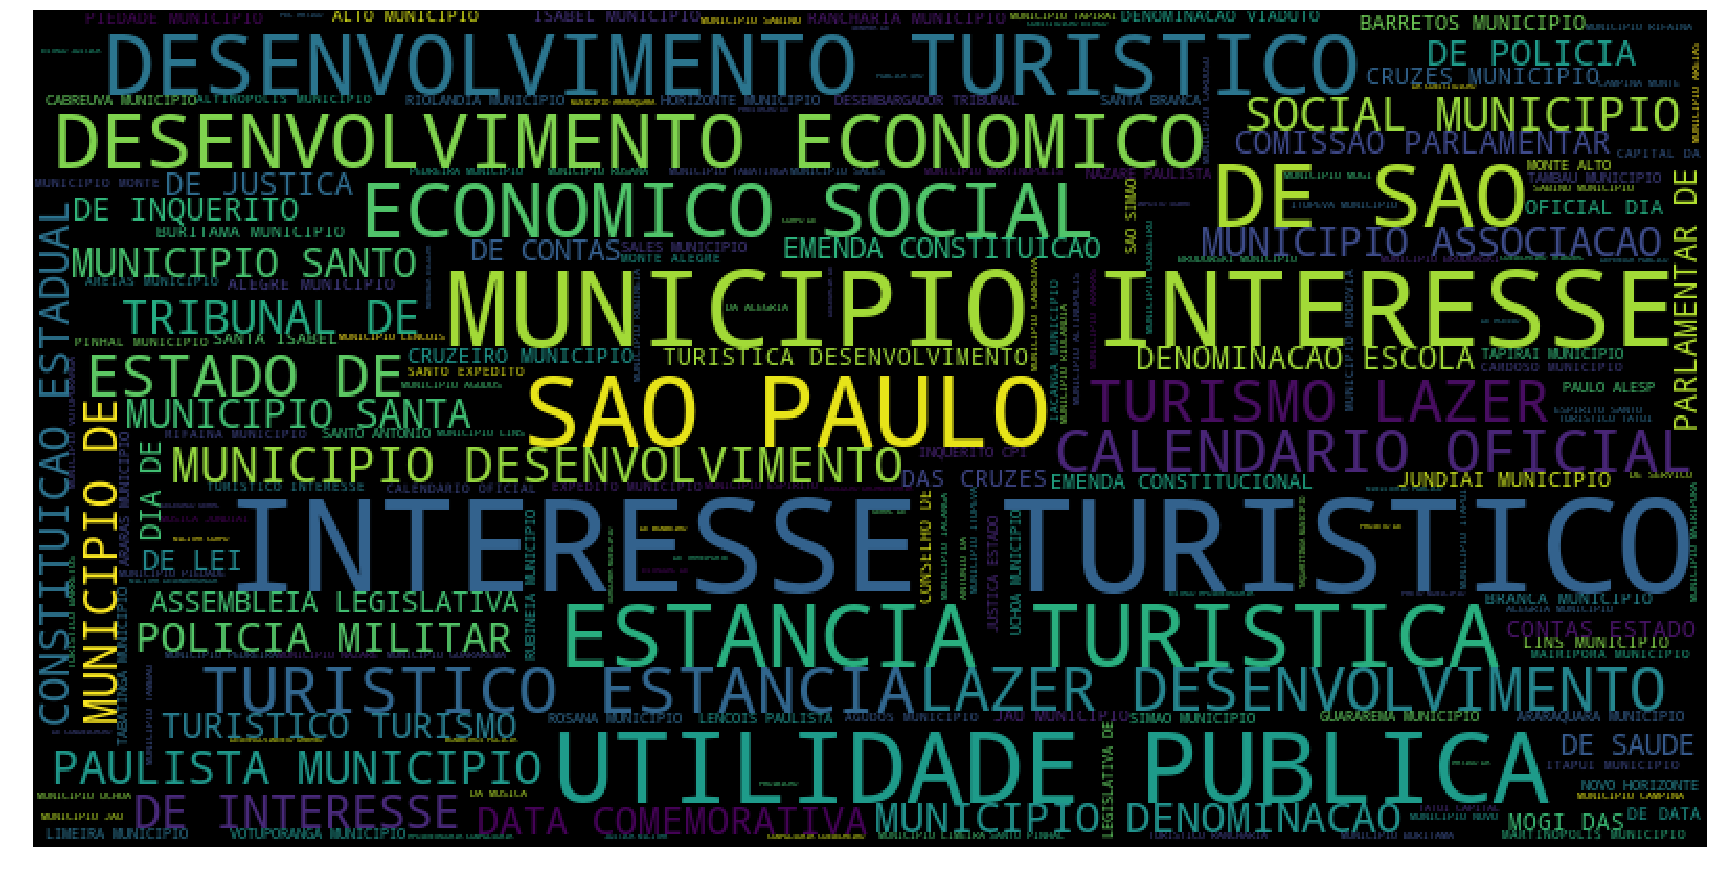

In [64]:
wordcloud = WordCloud(width=800, height=400).generate(' '.join(palavras_chave_dep['PalavraSemAcento']))
plt.figure( figsize=(30,20) )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
# Nuvem de palavras por nome - Gil Lancaster

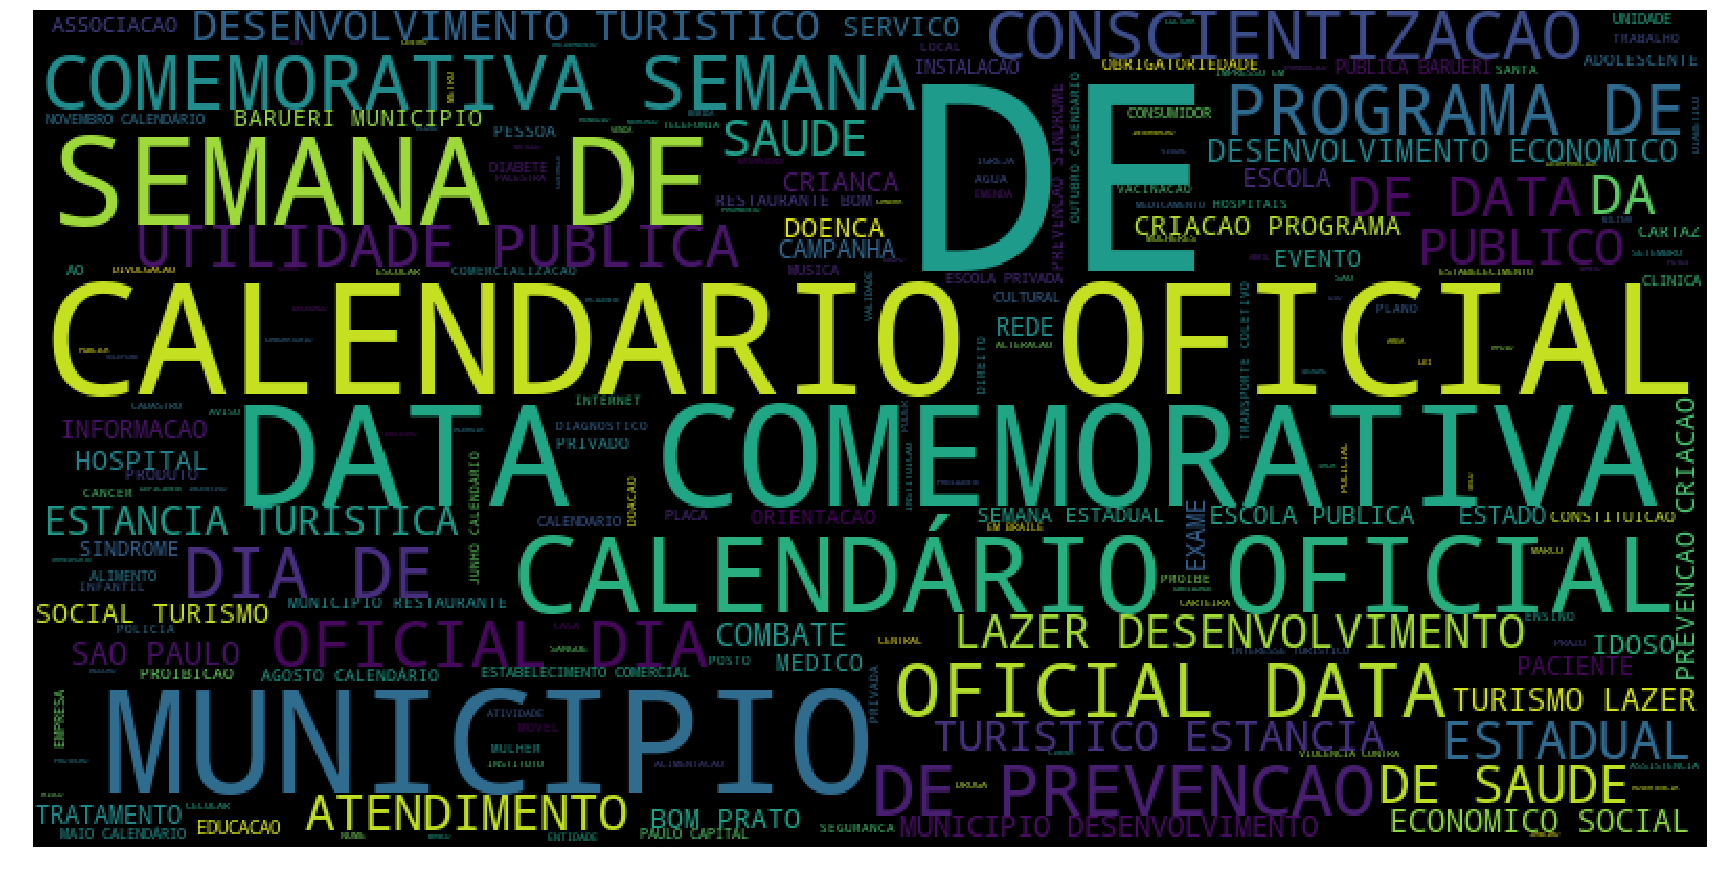

In [63]:
wordcloud = WordCloud(width=800, height=400).generate(' '.join(nome['PalavraSemAcento']))
plt.figure( figsize=(30,20) )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [48]:
# Nuvem de palavras por nome - Fernando Capez

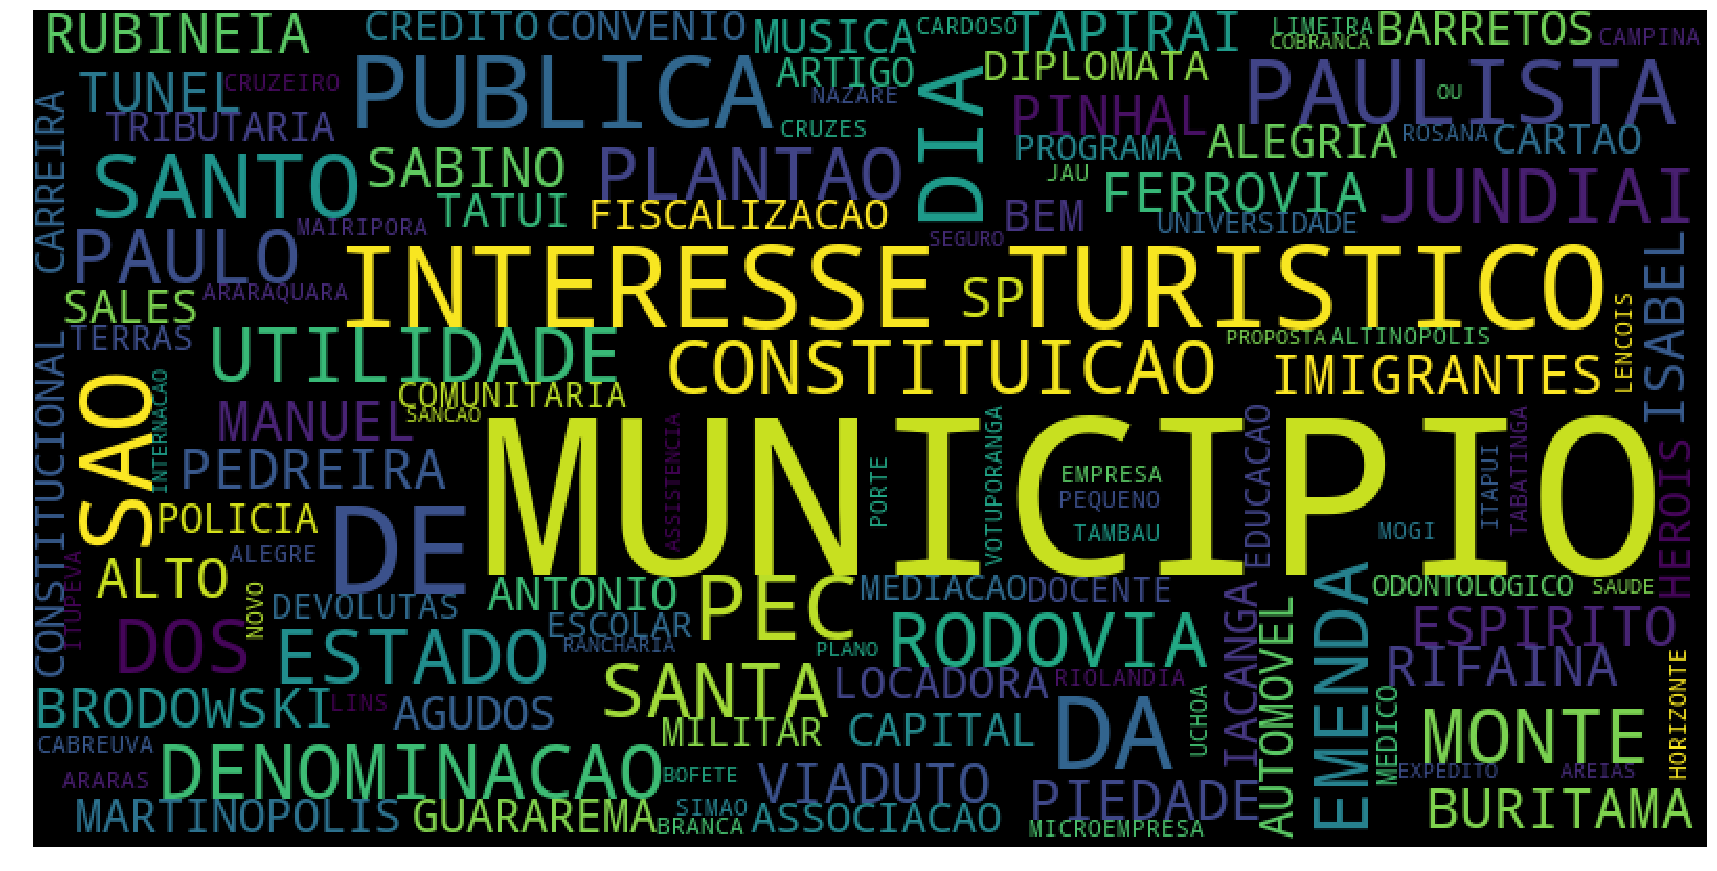

In [61]:
wordcloud = WordCloud(width=800, height=400).generate(' '.join(nome['PalavraSemAcento']))
plt.figure( figsize=(30,20) )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [67]:
# Edmir Chedid

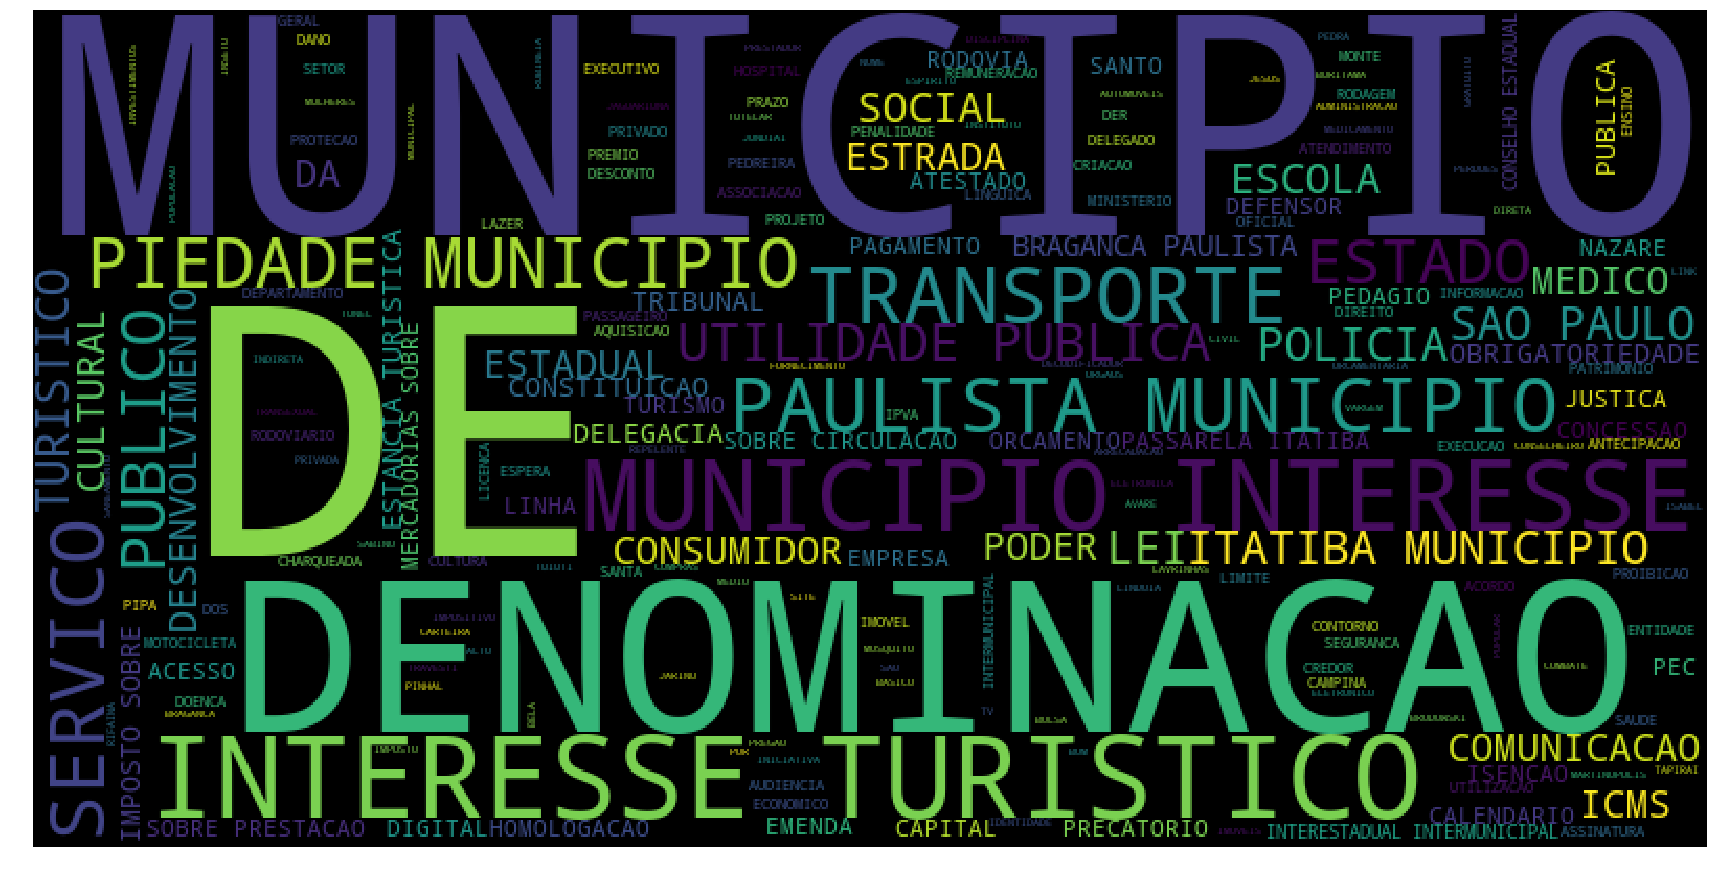

In [68]:
wordcloud = WordCloud(width=800, height=400).generate(' '.join(nome['PalavraSemAcento']))
plt.figure( figsize=(30,20) )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
# Conta palavras chave em geral

In [65]:
palavras_chave_dep['PalavraSemAcento'].value_counts()

DENOMINACAO                                             836
INTERESSE TURISTICO                                     721
UTILIDADE PUBLICA                                       526
ESTANCIA TURISTICA                                      398
TURISMO                                                 369
LAZER                                                   365
DESENVOLVIMENTO TURISTICO                               355
DESENVOLVIMENTO ECONOMICO E SOCIAL                      355
MUNICIPIO DE INTERESSE TURISTICO                        234
ALTERACAO                                               225
CALENDARIO OFICIAL                                      223
ASSOCIACAO                                              210
CONSTITUICAO ESTADUAL                                   177
DATA COMEMORATIVA                                       177
ESCOLA                                                  175
ESTADO DE SAO PAULO                                     145
ORCAMENTO                               

In [ ]:
# Conta palavras chave Edmir Chedid

In [69]:
nome['PalavraSemAcento'].value_counts()

DENOMINACAO                                                                                                                                        21
INTERESSE TURISTICO                                                                                                                                20
PIEDADE (MUNICIPIO)                                                                                                                                11
UTILIDADE PUBLICA                                                                                                                                   9
ITATIBA (MUNICIPIO)                                                                                                                                 7
BRAGANCA PAULISTA (MUNICIPIO)                                                                                                                       5
CONSUMIDOR                                                                                          

# Andamentos

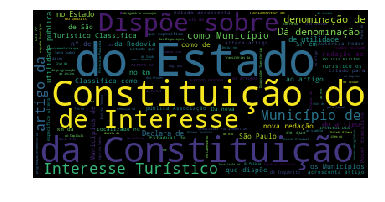

In [55]:
wordcloud = WordCloud(stopwords='stopwords.txt').generate(' '.join(autores_deputados['Ementa']))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [8]:
m1 = ~autores_atuais['Ementa'].isin(['Constituição','Dispõe','Constituição', 'artigo'])
m2 = autores_atuais['Ementa'].str.len() >= 2

In [9]:
sobra = autores_atuais.loc[m1 & m2, 'Ementa']

wordcloud = WordCloud().generate(' '.join(sobra))

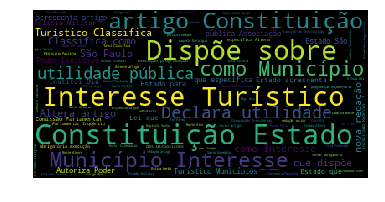

In [10]:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

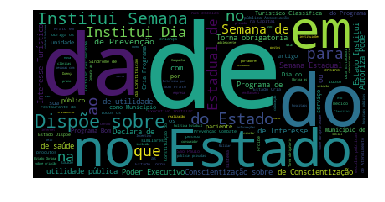

In [44]:
wordcloud = WordCloud(stopwords='stopwords.txt').generate(' '.join(nome['Ementa']))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [45]:
nome.reset_index()

,index,IdAutor,IdDocumento,NomeAutor,AnoLegislativo,CodOriginalidade,DtEntradaSistema,DtPublicacao,Ementa,IdNatureza,NroLegislativo
0,10,13083,1265747,Gil Lancaster,2015,1265747 230615 1413,2015-06-23T00:00:00-03:00,2015-06-26T00:00:00-03:00,Dispõe sobre a obrigatoriedade de aviso em tod...,1,1032
1,16,13083,1267305,Gil Lancaster,2015,1267305 290615 1551,2015-06-29T00:00:00-03:00,2015-07-01T00:00:00-03:00,Autoriza o Poder Executivo a conceder isenção ...,1,1064
2,18,13083,1267363,Gil Lancaster,2015,1267363 290615 1652,2015-06-29T00:00:00-03:00,2015-07-01T00:00:00-03:00,Torna obrigatória a inserção de mensagens educ...,1,1067
3,19,13083,1267364,Gil Lancaster,2015,1267364 290615 1657,2015-06-29T00:00:00-03:00,2015-07-01T00:00:00-03:00,Torna obrigatória a inclusão na grade curricul...,1,1066
4,20,13083,1267371,Gil Lancaster,2015,1267371 290615 1724,2015-06-29T00:00:00-03:00,2015-07-01T00:00:00-03:00,Dispõe sobre a colocação de brinquedos para pe...,1,1065
5,21,13083,1267377,Gil Lancaster,2015,1267377 290615 1741,2015-06-29T00:00:00-03:00,2015-07-01T00:00:00-03:00,"Institui a ""Semana de Prevenção e Combate a Ca...",1,1063
6,62,13083,1269754,Gil Lancaster,2015,1269754 050815 1454,2015-08-05T00:00:00-03:00,2015-08-08T00:00:00-03:00,Dispõe sobre a permissão de acesso aos portado...,1,1117
7,63,13083,1269757,Gil Lancaster,2015,1269757 050815 1502,2015-08-05T00:00:00-03:00,2015-08-08T00:00:00-03:00,"Institui a ""Semana da Cultura Lowrider"".",1,1116
8,281,13083,1279496,Gil Lancaster,2015,1279496 300915 1602,2015-09-30T00:00:00-03:00,2015-10-02T00:00:00-03:00,"Institui o ""Dia Estadual da Equoterapia"".",1,1312
9,282,13083,1279675,Gil Lancaster,2015,1279675 011015 1559,2015-10-01T00:00:00-03:00,2015-10-06T00:00:00-03:00,"Institui o ""Dia da Mulher Empreendedora"".",1,1319


In [46]:
nome.to_csv('projetos_gil_lancaster.csv', index=False, decimal = ',')

In [3]:
mask = autores_atuais['Ementa'].str.contains("emenda", na=False)
emenda = autores_atuais[mask]

In [4]:
emenda

,IdAutor,IdDocumento,NomeAutor,AnoLegislativo,CodOriginalidade,DtEntradaSistema,DtPublicacao,Ementa,IdNatureza,NroLegislativo
2749,10601,1000201852,Chico Sardelli,2018,1000201852 010218 2055,2018-02-01T00:00:00-02:00,2018-02-07T00:00:00-02:00,Determina que nas placas de obras inauguradas ...,1,16
